## MNIST 

In [34]:
import os
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

In [35]:
root = './data'
if not os.path.exists(root):
    os.mkdir(root)

In [36]:
train_set = dset.MNIST(root=root, train=True, transform=transforms.ToTensor(), download=True)
test_set = dset.MNIST(root=root, train=False, transform=transforms.ToTensor(), download=True)

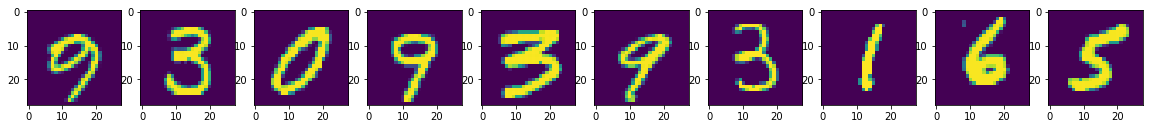

In [37]:
import random 

tensor_to_PIL = transforms.ToPILImage()

rand_idx_lst = random.sample(range(50000), 10)
fig, axes = plt.subplots(1, 10, figsize=(20, 5))

for idx in range(len(axes)):
    axes[idx].imshow(tensor_to_PIL(train_set[rand_idx_lst[idx]][0]))
        
plt.show()
plt.close()

In [38]:
batch_size = 100
total_epoch = 10
learning_rate = 0.01
use_cuda = torch.cuda.is_available() # [Question 1] What is role of torch.cuda.is_available?

In [39]:
train_loader = torch.utils.data.DataLoader(  # [Question 2] What is role of torch.utils.data.DataLoader?
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

In [40]:
print('==>>> total trainning batch number: {}'.format(len(train_loader)))
print('==>>> total testing batch number: {}'.format(len(test_loader)))

==>>> total trainning batch number: 600
==>>> total testing batch number: 100


In [41]:
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 500) # [Question 3]What is role of nn.Linear?
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1, 28*28) # [Question 4] (4-1)What is role of view? (4-2)What does '-1' mean?
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def name(self):
        return "MLP"

In [42]:
model = MLPNet()

if use_cuda:
    model = model.cuda()

In [44]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # [Question 5] What is role of SGD?
criterion = nn.CrossEntropyLoss() # [Question 6] What is role of CrossEntropyLoss?

In [45]:
for epoch in range(total_epoch):
    # trainning
    total_loss = 0
    total_batch = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad() # [Question 7] What is role of zero_grad?
        if use_cuda:
            x, target = x.cuda(), target.cuda()
            
        out = model(x)
        loss = criterion(out, target) # [Question 8] What is the output of criterion(out, target)?
        total_loss += loss.item()
        total_batch += 1
        loss.backward() # [Question 9] What is role of backward?
        optimizer.step() # [Question 10] What is role of step?
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print ('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'
                   .format(epoch, batch_idx+1, total_loss / total_batch))
    
    # testing
    total_loss = 0
    total_batch = 0
    correct_cnt = 0
    total_cnt = 0
    
    for batch_idx, (x, target) in enumerate(test_loader):
        if use_cuda:
            x, target = x.cuda(), target.cuda()
            
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.data.size()[0]
        correct_cnt += (pred_label == target.data).sum().item()
        
        total_loss += loss.item()
        total_batch += 1
        
        if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(test_loader):
            print ('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'
                   .format(epoch, batch_idx+1, total_loss / total_batch, correct_cnt * 1.0 / total_cnt))

==>>> epoch: 0, batch index: 100, train loss: 2.287267
==>>> epoch: 0, batch index: 200, train loss: 2.265424
==>>> epoch: 0, batch index: 300, train loss: 2.233559
==>>> epoch: 0, batch index: 400, train loss: 2.186270
==>>> epoch: 0, batch index: 500, train loss: 2.113461
==>>> epoch: 0, batch index: 600, train loss: 2.015394
==>>> epoch: 0, batch index: 100, test loss: 1.351651, acc: 0.752
==>>> epoch: 1, batch index: 100, train loss: 1.224529
==>>> epoch: 1, batch index: 200, train loss: 1.107911
==>>> epoch: 1, batch index: 300, train loss: 1.020401
==>>> epoch: 1, batch index: 400, train loss: 0.944706
==>>> epoch: 1, batch index: 500, train loss: 0.887601
==>>> epoch: 1, batch index: 600, train loss: 0.836507
==>>> epoch: 1, batch index: 100, test loss: 0.550035, acc: 0.860
==>>> epoch: 2, batch index: 100, train loss: 0.542005
==>>> epoch: 2, batch index: 200, train loss: 0.534218
==>>> epoch: 2, batch index: 300, train loss: 0.519469
==>>> epoch: 2, batch index: 400, train los